__Ciencia de datos en Biología__

_PCiC_

`2025-2`

# Proteínas

![texto del vínculo](https://www.polyplus-sartorius.com/wp-content/uploads/2023/08/PROTEI1.png)


Codigo
![texto del vínculo](https://biology.kenyon.edu/courses/biol114/Chap05/code.gif)

Estructura primaria
![texto del vínculo](https://cdn.kastatic.org/ka-perseus-images/e431f277fa3d47874265a65cc8824fe9f027019f.png)

Estructura secundaria
![texto del vínculo](https://cdn.kastatic.org/ka-perseus-images/6c1459b742ced7cb1175cef18b4e2bde9036bb13.png)

Estructura terciaria
![texto del vínculo](https://cdn.kastatic.org/ka-perseus-images/3ba13311a5f09f50b97790b1690b5f8fdca46a85.png)

Estructura cuaternaria
![texto del vínculo](https://cdn.kastatic.org/ka-perseus-images/0b6f134b8178523d595a87fd3a80988aed20c8ae.png)

## Clasification of proteins

In [15]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metada

In [1]:
# Importamos las paqueterias necesarias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Cargamos los datos
# Usa ">" como separador (formato tipo FASTA).
# No hay encabezados, por eso header=None.
data = pd.read_csv('../Datos/Tarea_unidad_3/DATA 4/hbp.txt',
                   sep=">",header=None)

## Extrae la columna 0 (secuencias) y elimina valores vacíos
sequences=data[0].dropna()
# Extrae la columna 1 (nombres o IDs) y elimina valores vacíos
labels=data[1].dropna()

#Reinicia los índices para que las dos series estén alineadas correctamente al combinarlas.
sequences.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)
list_of_series=[sequences.rename("sequences"),labels.rename("Name")]

## Une ambas columnas horizontalmente en un DataFrame
df_hbp = pd.concat(list_of_series, axis=1)

## Asigna una etiqueta para indicar que estas secuencias son "hbp"
df_hbp['label']='hbp'

# Muestra las primeras filas del DataFrame
df_hbp.head()

,sequences,Name,label
0,MNTHESEVYTVAPEMPAMFDGMKLAAVATVLYVIVRCLNLKSPTAP...,hormone|Q802V6|ABH2,hbp
1,MIVLSVGSASSSPIVVVFSVALLLFYFSETSLGAPCPINGLPIVRN...,hormone|P33487|ABP1,hbp
2,MVRRRPATGAAPRPHLAAVGRGLLLASVLAAAASSLPVAESSCPRD...,hormone|P33488|ABP4,hbp
3,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,hormone|P05067|A4_H,hbp
4,MNEPAKHRLGCTRTPEPDIRLRKGHQLDDTRGSNNDNYQGDLEPSL...,hormone|Q8BQS5|ADR2,hbp


In [8]:
df_hbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sequences  123 non-null    object
 1   Name       123 non-null    object
 2   label      123 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [7]:
# Carga de datos NO-HBP
data = pd.read_csv('../Datos/Tarea_unidad_3/DATA 4/non-hbp.txt', sep=">",header=None)
sequences=data[0].dropna()
labels=data[1].dropna()
sequences.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)
list_of_series=[sequences.rename("sequences"),labels.rename("Name")]
df_N_hbp = pd.concat(list_of_series, axis=1)
df_N_hbp['label']='non-hbp'
df_N_hbp.head()

,sequences,Name,label
0,MEQTVLVPPGPDSFNFFTRESLAAIERRIAEEKAKNPKPDKKDDDE...,human|P35498|SCN1A_,non-hbp
1,MTAWLISLMSIEVLLLAVRHLSLHIEPEEGSLAGGTWITVIFDGLE...,human|P08F94|PKHD1_,non-hbp
2,MEDEAVLDRGASFLKHVCDEEEVEGHHTIYIGVHVPKSYRRRRRHK...,human|Q9Y6R1|S4A4_H,non-hbp
3,MAELPTTETPGDATLCSGRFTISTLLSSDEPSPPAAYDSSHPSHLT...,human|P55017|S12A3_,non-hbp
4,MAPGAPSSSPSPILAVLLFSSLVLSPAQAIVVYTDREVHGAVGSRV...,human|P25189|MYP0_H,non-hbp


In [9]:
df_N_hbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sequences  123 non-null    object
 1   Name       123 non-null    object
 2   label      123 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [10]:
#Unificación de datos HBP y no-HBP
frames = [df_hbp,df_N_hbp]
df=pd.concat(frames)
df.head()

,sequences,Name,label
0,MNTHESEVYTVAPEMPAMFDGMKLAAVATVLYVIVRCLNLKSPTAP...,hormone|Q802V6|ABH2,hbp
1,MIVLSVGSASSSPIVVVFSVALLLFYFSETSLGAPCPINGLPIVRN...,hormone|P33487|ABP1,hbp
2,MVRRRPATGAAPRPHLAAVGRGLLLASVLAAAASSLPVAESSCPRD...,hormone|P33488|ABP4,hbp
3,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,hormone|P05067|A4_H,hbp
4,MNEPAKHRLGCTRTPEPDIRLRKGHQLDDTRGSNNDNYQGDLEPSL...,hormone|Q8BQS5|ADR2,hbp


In [11]:

#Cálculo de longitud de secuencias
arr = []

# Calcula la longitud de cada secuencia y la guarda en una lista
for i in df.sequences:
    arr.append(len(i))

# Convierte la lista a un arreglo de NumPy
arr = np.asarray(arr)
# Muestra la longitud mínima de las secuencias
print("Minimum length of string is = ", arr.min())
minlength = arr.min()



Minimum length of string is =  96


In [16]:
#Tokenización y padding de las secuencias
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

#e define el largo máximo de las secuencias. Aquí se usa el mínimo (de una línea anterior)
max_length = 96

#Se crea un tokenizador que trabaja a nivel de carácter (char_level=True).
tokenizer = Tokenizer(char_level=True)
#Aprende el "vocabulario" de todos los caracteres presentes en las secuencias.
tokenizer.fit_on_texts(df.sequences)

#Convierte las secuencias en listas de enteros (según el vocabulario aprendido).
X = tokenizer.texts_to_sequences(df.sequences)

#Aplica padding a cada secuencia para que todas tengan la misma longitud (max_length).
X = pad_sequences(X, maxlen=max_length)

2025-06-13 05:30:14.372484: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 05:30:14.387613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749792614.404376     297 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749792614.409231     297 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749792614.422033     297 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [18]:
tokenizer

In [21]:
from sklearn.preprocessing import LabelBinarizer
import keras

#Se usa LabelBinarizer para convertir etiquetas de texto ('hbp', 'non-hbp') en etiquetas numéricas (0 o 1).
lb = LabelBinarizer()
Y = lb.fit_transform(df.label)

#Muestra la longitud de las secuencias codificadas (todas deberían tener max_length).
print(len(X[0]))

96


In [22]:
from sklearn.model_selection import train_test_split

#Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%).
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

from sklearn.svm import SVC
#Se crea un modelo de Máquina de Vectores de Soporte (SVM) con parámetros por defecto.
model = SVC()
#Se entrena el modelo con las secuencias tokenizadas.
model.fit(X_train,y_train)


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [23]:
#Se hacen predicciones sobre el conjunto de prueba.
preds = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

#Se imprime la matriz de confusión y un informe de clasificación (precisión, recall, F1-score).
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

[[19 17]
 [17 21]]


              precision    recall  f1-score   support

           0       0.53      0.53      0.53        36
           1       0.55      0.55      0.55        38

    accuracy                           0.54        74
   macro avg       0.54      0.54      0.54        74
weighted avg       0.54      0.54      0.54        74



In [24]:
#Ajuste de hiperparámetros (Grid Search)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001],
'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.514 total time=   0.0s
[CV 3/5] END ....C=100, gamm

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [26]:
#Evaluación del mejor modelo
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[19 17]
 [15 23]]


              precision    recall  f1-score   support

           0       0.56      0.53      0.54        36
           1       0.57      0.61      0.59        38

    accuracy                           0.57        74
   macro avg       0.57      0.57      0.57        74
weighted avg       0.57      0.57      0.57        74



In [27]:
# Librerías necesarias para construir y entrenar la red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping


# Definición del modelo secuencial
model = Sequential()

# Capa densa inicial (fully connected)
# SUGERENCIA: Cambia 246 por el tamaño de entrada real (X_train.shape[1])
model.add(Input(shape=(X_train.shape[1],)))  # <- Aquí usamos Input

model.add(Dense(units=246, activation='relu'))

# Capa Dropout para evitar overfitting
model.add(Dropout(0.5))

# Segunda capa oculta
model.add(Dense(units=120, activation='relu'))

# Dropout nuevamente
model.add(Dropout(0.5))

# Capa de salida para clasificación binaria (una neurona con activación sigmoide)
model.add(Dense(units=1, activation='sigmoid'))

2025-06-13 05:34:34.838989: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [28]:
# Compilamos con pérdida binaria y métrica de exactitud
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Resumen del modelo para revisar arquitectura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 246)            │        23,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 246)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        29,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,623 (209.46 KB)

 Trainable params: 53,623 (209.46 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Early stopping si el modelo deja de mejorar en 25 épocas
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
# Entrenamos el modelo por máximo 400 épocas, batch size 64
model.fit(
    x=X_train,
    y=y_train,
    epochs=400,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5292 - loss: 3.5907 - val_accuracy: 0.5541 - val_loss: 1.1624
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4406 - loss: 4.3935 - val_accuracy: 0.6081 - val_loss: 0.9693
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6012 - loss: 2.5135 - val_accuracy: 0.5000 - val_loss: 1.1011
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5331 - loss: 2.4703 - val_accuracy: 0.4865 - val_loss: 1.5410
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5788 - loss: 1.8761 - val_accuracy: 0.4730 - val_loss: 1.2084
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5273 - loss: 1.7545 - val_accuracy: 0.4459 - val_loss: 1.0050
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5622 - loss: 1.9809 - val_accuracy: 0.4865 - val_loss: 0.9649
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5029 - loss: 1.6983 - val_accuracy: 0.4459 - val_loss

Text(0.5, 0, 'Epoch')

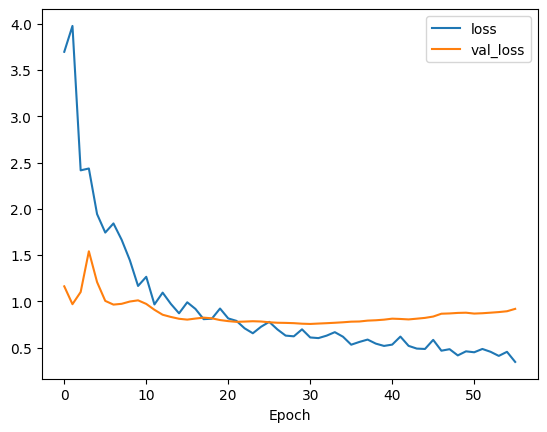

In [31]:
# Gráfica de la pérdida de entrenamiento y validación
model_loss = pd.DataFrame(model.history.history)
ax = model_loss[['loss','val_loss']].plot()
ax.set_xlabel('Epoch')

In [32]:
# Predicciones: clase 1 si probabilidad > 0.5
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Métricas de desempeño
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[22 14]
 [27 11]]
              precision    recall  f1-score   support

           0       0.45      0.61      0.52        36
           1       0.44      0.29      0.35        38

    accuracy                           0.45        74
   macro avg       0.44      0.45      0.43        74
weighted avg       0.44      0.45      0.43        74



In [33]:

#podemos probar con la frecuencias de aminoacidos

def frequencyVec(seq):
  # Define los 20 aminoácidos estándar que se usarán para contar frecuencias
    encoder = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W',
               'Y']
    # Inicializa un vector de ceros con tamaño 20 (uno por aminoácido)
    fv = [0 for x in range(20)]

    # Itera sobre cada aminoácido y cuenta cuántas veces aparece en la secuencia
    for i in range(20):
        fv[i] = seq.count(encoder[i])

    return fv

# Aplica la función de frecuencia a cada secuencia de proteínas
X_frequencyVec = []
for i in df.sequences:
    X_frequencyVec.append(frequencyVec(i))


# Convierte la lista de vectores a un array de NumPy para usarlo como entrada al modelo
X_frequencyVec = np.asarray(X_frequencyVec)
X_frequencyVec.shape  # (num_secuencias, 20)


(246, 20)

In [34]:
# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_frequencyVec, Y, test_size=0.3, random_state=0)

In [35]:

model = Sequential()

# Capa densa de entrada (espera vectores de 20 características)
model.add(Dense(units=20, activation='relu', input_shape=(20,)))  # ❗ input_shape=(20,) ya que son 20 aminoácidos

model.add(Dropout(0.5))  # Previene overfitting

# Segunda capa oculta
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida con activación sigmoide para clasificación binaria
model.add(Dense(units=1, activation='sigmoid'))

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(
    x=X_train,
    y=y_train,
    epochs=400,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4874 - loss: 15.7521 - val_accuracy: 0.4730 - val_loss: 5.4113
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4941 - loss: 15.2860 - val_accuracy: 0.4865 - val_loss: 4.1394
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5155 - loss: 9.0599 - val_accuracy: 0.5135 - val_loss: 3.1491
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5273 - loss: 11.9989 - val_accuracy: 0.5405 - val_loss: 2.4695
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5097 - loss: 8.5761 - val_accuracy: 0.5270 - val_loss: 1.8794
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5136 - loss: 7.9526 - val_accuracy: 0.5676 - val_loss: 1.4285
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4387 - loss: 8.7804 - val_accuracy: 0.6081 - val_loss: 1.1126
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5263 - loss: 6.5550 - val_accuracy: 0.5946 - val_lo

Text(0.5, 0, 'Epoch')

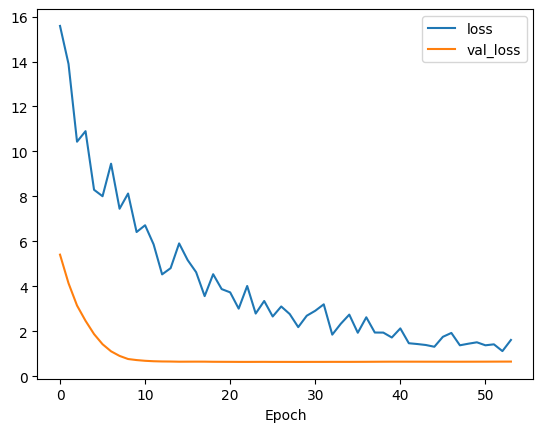

In [37]:

model_loss = pd.DataFrame(model.history.history)
ax = model_loss[['loss','val_loss']].plot()
ax.set_xlabel('Epoch')

In [39]:
#predictions = model.predict_classes(X_test)

predictions = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[ 4 31]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.21        35
           1       0.56      1.00      0.72        39

    accuracy                           0.58        74
   macro avg       0.78      0.56      0.46        74
weighted avg       0.77      0.58      0.47        74



In [40]:
def frequencyVec(seq):
    encoder = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    fv = [0 for x in range(20)]  # Vector inicial con ceros, uno por cada aminoácido

    for i in range(20):
        fv[i] = seq.count(encoder[i]) / len(seq)  # Cuenta cuántas veces aparece cada aminoácido
    return fv

In [41]:
X_frequencyVec = []
for i in df.sequences:
    X_frequencyVec.append(frequencyVec(i))

In [42]:
X_frequencyVec = np.asarray(X_frequencyVec)
X_frequencyVec.shape

(246, 20)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_frequencyVec, Y, test_size=0.3, random_state=0)

In [44]:
model = Sequential()
model.add(Input(shape=(20,)))  # Forma de entrada explícita

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=45, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 45)             │           945 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,
          y=y_train,
          epochs=400,
          batch_size=64,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4981 - loss: 0.6912 - val_accuracy: 0.5270 - val_loss: 0.6929
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5069 - loss: 0.6924 - val_accuracy: 0.5541 - val_loss: 0.6929
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4854 - loss: 0.6959 - val_accuracy: 0.5405 - val_loss: 0.6931
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4914 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5146 - loss: 0.6935 - val_accuracy: 0.4730 - val_loss: 0.6931
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4582 - loss: 0.6959 - val_accuracy: 0.4865 - val_loss: 0.6931
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5253 - loss: 0.6908 - val_accuracy: 0.5135 - val_loss: 0.6931
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5477 - loss: 0.6931 - val_accuracy: 0.4595 - val_loss:

In [46]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f266478e200> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[21 14]
 [10 29]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        35
           1       0.67      0.74      0.71        39

    accuracy       

In [47]:
from sklearn.model_selection import KFold

In [50]:
#Podemos intentar refinar nuesto algoritmo, utilizando Kfold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
all_conf_matrices = []
all_class_reports = []

In [52]:
fold = 1
for train_index, test_index in kf.split(X_frequencyVec):
    print(f"\n📂 Fold {fold}")

    X_train, X_test = X_frequencyVec[train_index], X_frequencyVec[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # --- Modelo ---
    model = Sequential([
        Input(shape=(20,)),  # 20 features = 20 aminoácidos
        Dense(20, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=0)

    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=300, batch_size=32, verbose=0,
              callbacks=[early_stop])

    # --- Evaluación ---
    predictions = (model.predict(X_test) > 0.5).astype("int32")

    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)

    all_conf_matrices.append(cm)
    all_class_reports.append(report)

    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    fold += 1


📂 Fold 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[21  5]
 [13 11]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        26
           1       0.69      0.46      0.55        24

    accuracy                           0.64        50
   macro avg       0.65      0.63      0.62        50
weighted avg       0.65      0.64      0.63        50


📂 Fold 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[14 11]
 [ 9 15]]
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        25
           1       0.58      0.62      0.60        24

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49


📂 Fold 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[20  3]
 [23  3]]
              precision    recall  f1-score   support

           0       0.47      0.87      0.61        23
           1       0.50      0.12   

In [54]:
# Promedio de resultados ---
def average_reports(reports, labels=["0", "1"]):
    avg = {}
    for label in labels:
        avg[label] = {}
        for metric in ["precision", "recall", "f1-score", "support"]:
            avg[label][metric] = np.mean([r[label][metric] for r in reports])
    avg["accuracy"] = np.mean([r["accuracy"] for r in reports])
    return avg

avg_metrics = average_reports(all_class_reports)

print("\n🔎 Promedio de métricas por clase:")
for label in ["0", "1"]:
    print(f"Clase {label}:")
    for metric, value in avg_metrics[label].items():
        print(f"  {metric}: {value:.2f}")

print(f"\n🎯 Accuracy promedio: {avg_metrics['accuracy']:.2f}")


🔎 Promedio de métricas por clase:
Clase 0:
  precision: 0.57
  recall: 0.71
  f1-score: 0.62
  support: 24.60
Clase 1:
  precision: 0.61
  recall: 0.46
  f1-score: 0.50
  support: 24.60

🎯 Accuracy promedio: 0.58


In [70]:
df.sequences

0      MNTHESEVYTVAPEMPAMFDGMKLAAVATVLYVIVRCLNLKSPTAP...
1      MIVLSVGSASSSPIVVVFSVALLLFYFSETSLGAPCPINGLPIVRN...
2      MVRRRPATGAAPRPHLAAVGRGLLLASVLAAAASSLPVAESSCPRD...
3      MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...
4      MNEPAKHRLGCTRTPEPDIRLRKGHQLDDTRGSNNDNYQGDLEPSL...
                             ...                        
118    MGDSTGEPGSSMHGVTGREQSFAFSVQSPIVHTDKTAKFDLPVDTE...
119    MVAQAPHDDHQDDEKLAAARQKEIEDWLPITSSRNAKWWYSAFHNV...
120    MSLFNTENTWAFVFGLLGNLISFAVFLSPVPTFYRIWKKKTTEGFQ...
121    MAQRREPDPPPPQRRILRTQTVGSLGEAMLDSEVVPSSLVEIAPIL...
122    MLTLSKFHVILIPILFFITLLSPLFSIALPINIWPKPRFLSWPQHK...
Name: sequences, Length: 246, dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    df.sequences, Y, test_size=0.2, random_state=1
)


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
# 1.5. Codificación con CountVectorizer usando k-mers (aquí 4-mers)
vect = CountVectorizer(analyzer='char', ngram_range=(3,3), max_features=500)

vect.fit(X_train)

CountVectorizer(analyzer='char', max_features=500, ngram_range=(3, 3))

In [75]:
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [76]:
# 1.6. Convertir a matriz densa para usar con Keras
X_train_vect = X_train_vect.toarray()
X_test_vect = X_test_vect.toarray()


In [78]:
model = Sequential()
model.add(Input(shape=(500,)))  # O el número exacto de features que salgan del CountVectorizer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model.fit(X_train_vect, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4446 - loss: 2.9979 - val_accuracy: 0.5750 - val_loss: 0.7437
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - loss: 0.6262 - val_accuracy: 0.6250 - val_loss: 0.6331
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8039 - loss: 0.4306 - val_accuracy: 0.6000 - val_loss: 0.6348
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8858 - loss: 0.3403 - val_accuracy: 0.5750 - val_loss: 0.6664
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9157 - loss: 0.2709 - val_accuracy: 0.6500 - val_loss: 0.6806
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9464 - loss: 0.2017 - val_accuracy: 0.5500 - val_loss: 0.7622
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9598 - loss: 0.1927 - val_accuracy: 0.5500 - val_loss: 0.8352
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9948 - loss: 0.1294 - val_accuracy: 0.5750 - val_loss:

In [82]:
loss, accuracy = model.evaluate(X_test_vect, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6292 - loss: 1.4573 
Test Accuracy: 0.6000


In [84]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = model.predict(X_test_vect).ravel()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

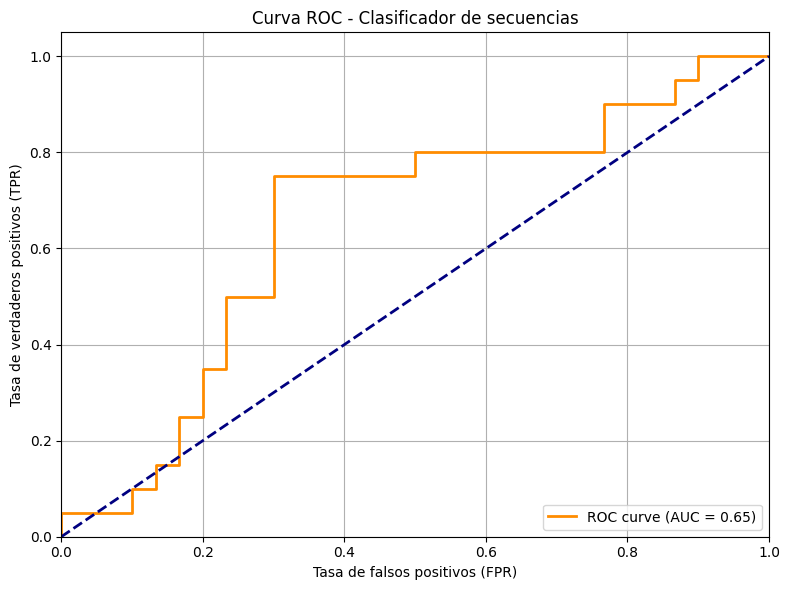

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Clasificador de secuencias')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()